In [3]:
from dataset import FinancialDataset, DataHandler
from trainer_new import PortfolioTrainer
from markowitz import MaxSharpe
from models import NN_Sharpe
import matplotlib.pyplot as plt
import numpy as np
import torch

In [4]:
%load_ext autoreload
%autoreload 2

# Class FinancialDataset

In [5]:
financial_dataset = FinancialDataset(synthetic=True, n_simul=10)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed


In [6]:
financial_dataset.dataset

tensor([[[-0.0077,  0.0366],
         [ 0.0051,  0.0158],
         [ 0.0205, -0.0050],
         ...,
         [-0.0007,  0.0152],
         [ 0.0119,  0.0175],
         [-0.0196,  0.0006]]])

In [7]:
financial_dataset.dataset_synthetic

tensor([[[-0.0098, -0.0077],
         [-0.0315, -0.0219],
         [-0.0176, -0.0072],
         ...,
         [-0.0368, -0.0159],
         [-0.0175, -0.0056],
         [ 0.0334,  0.0146]],

        [[-0.0252,  0.0103],
         [ 0.0092, -0.0174],
         [ 0.0055, -0.0013],
         ...,
         [-0.0258, -0.0100],
         [ 0.0507,  0.0252],
         [ 0.0060,  0.0212]],

        [[ 0.0077,  0.0011],
         [ 0.0124,  0.0095],
         [ 0.0399,  0.0122],
         ...,
         [-0.0055,  0.0091],
         [ 0.0034,  0.0090],
         [-0.0303, -0.0367]],

        ...,

        [[ 0.0444,  0.0175],
         [-0.0096, -0.0252],
         [-0.0298, -0.0021],
         ...,
         [ 0.0315, -0.0031],
         [ 0.0200,  0.0162],
         [ 0.0066,  0.0174]],

        [[ 0.0218,  0.0183],
         [ 0.0098, -0.0258],
         [ 0.0222,  0.0084],
         ...,
         [-0.0176, -0.0359],
         [-0.0097,  0.0082],
         [-0.0099, -0.0083]],

        [[ 0.0316, -0.0039],
       

10 simulations gaussiennes pour les données synthétiques

torch.Size([10, 3791, 2])


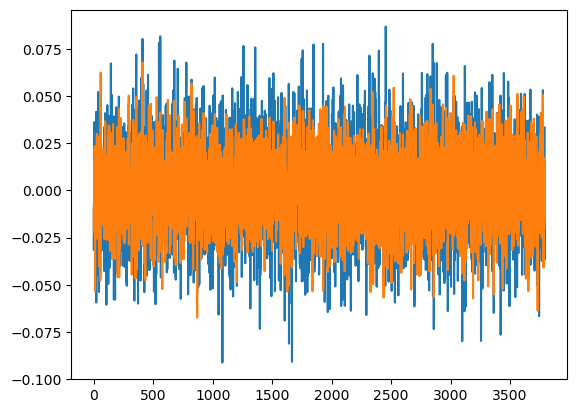

In [18]:
print(financial_dataset.dataset_synthetic.shape)
plt.plot(financial_dataset.dataset_synthetic[0, :, :])

<Axes: xlabel='Date'>

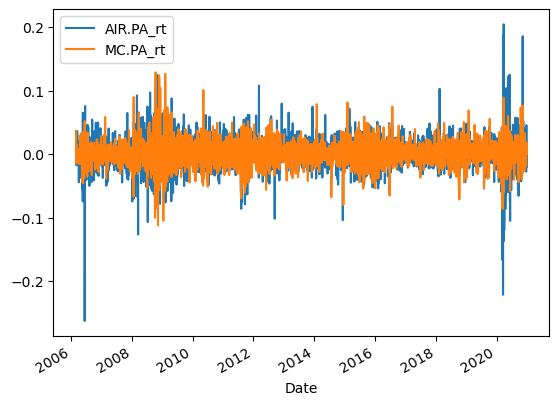

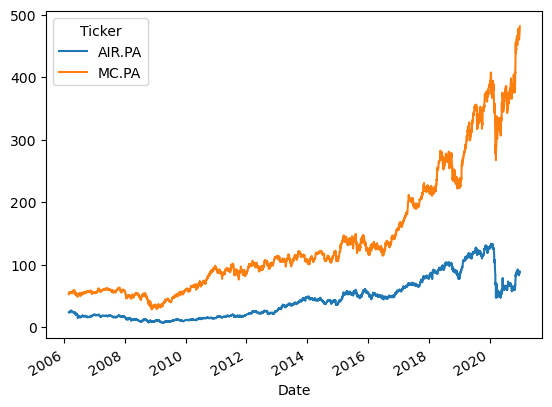

In [19]:
financial_dataset._raw_data['returns'].plot()
financial_dataset._raw_data['prices'].plot()

# dictionnaire qui contient 'prices' et 'returns

# Class DataHandler

In [358]:
data_handler = DataHandler(
    dataset=financial_dataset,
    initial_train_years=4,
    retrain_years=2,
    rolling_window=50,
    batch_size=1,
    overlap=True,
    shuffle=False,
    on_synthetic=True
)

In [359]:
for i in range(len(data_handler.periods_train)):
    print(f"TRAIN : {data_handler.periods_train[i]}; TEST : {data_handler.periods_invest[i]}")

TRAIN : (51, 1059); TEST : (1059, 1563)
TRAIN : (1059, 1563); TEST : (1563, 2067)
TRAIN : (1563, 2067); TEST : (2067, 2571)
TRAIN : (2067, 2571); TEST : (2571, 3075)
TRAIN : (2571, 3075); TEST : (3075, 3579)


### Méthode _compute_data

In [360]:
data_handler._compute_data(start=0,
                           end=100,
                           training=True,
                           )

"""
return : 
    rolling_window de la data basé sur l'overlap/training
    si training : retourne également le Y associé
"""

"\nreturn : \n    rolling_window de la data basé sur l'overlap/training\n    si training : retourne également le Y associé\n"

In [361]:
rolling_data = data_handler._compute_data(start=200,
                           end=300,
                           training=True)


In [362]:
dataloader, xtest, dates = data_handler.load_period(0)

Training period from 51 to 1059
Investment period from 1059 to 1563


 80%|████████  | 8/10 [48:23<12:05, 362.95s/it]


In [363]:
len(xtest)

for sim in range(data_handler.n_simul):
    print(sim*(dates[3]-dates[2]), (sim+1)*(dates[3]-dates[2]))

0 504
504 1008
1008 1512
1512 2016
2016 2520
2520 3024
3024 3528
3528 4032
4032 4536
4536 5040
5040 5544
5544 6048
6048 6552
6552 7056
7056 7560
7560 8064
8064 8568
8568 9072
9072 9576
9576 10080
10080 10584
10584 11088
11088 11592
11592 12096
12096 12600
12600 13104
13104 13608
13608 14112
14112 14616
14616 15120
15120 15624
15624 16128
16128 16632
16632 17136
17136 17640
17640 18144
18144 18648
18648 19152
19152 19656
19656 20160
20160 20664
20664 21168
21168 21672
21672 22176
22176 22680
22680 23184
23184 23688
23688 24192
24192 24696
24696 25200
25200 25704
25704 26208
26208 26712
26712 27216
27216 27720
27720 28224
28224 28728
28728 29232
29232 29736
29736 30240
30240 30744
30744 31248
31248 31752
31752 32256
32256 32760
32760 33264
33264 33768
33768 34272
34272 34776
34776 35280
35280 35784
35784 36288
36288 36792
36792 37296
37296 37800
37800 38304
38304 38808
38808 39312
39312 39816
39816 40320
40320 40824
40824 41328
41328 41832
41832 42336
42336 42840
42840 43344
43344 43848


# Class PortfolioTrainer

[*********************100%***********************]  2 of 2 completed
/Users/alexandre/pandas_mastering/DL-Portfolio-CMAP/src/dataset.py:98: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change().dropna()


Training period from 101 to 1109
Investment period from 1109 to 2117


100%|██████████| 10/10 [00:00<00:00, 18.33it/s]


-0.00047776330393642434
torch.Size([4032, 100, 2])


100%|██████████| 4032/4032 [00:02<00:00, 1399.06it/s]


1109 2117


100%|██████████| 4/4 [00:00<00:00, 10362.70it/s]


Training period from 1109 to 2117
Investment period from 2117 to 3125


100%|██████████| 10/10 [00:00<00:00, 18.16it/s]


-0.0003389986993877553
torch.Size([4032, 100, 2])


100%|██████████| 4032/4032 [00:02<00:00, 1447.00it/s]


2117 3125


100%|██████████| 4/4 [00:00<00:00, 10100.67it/s]


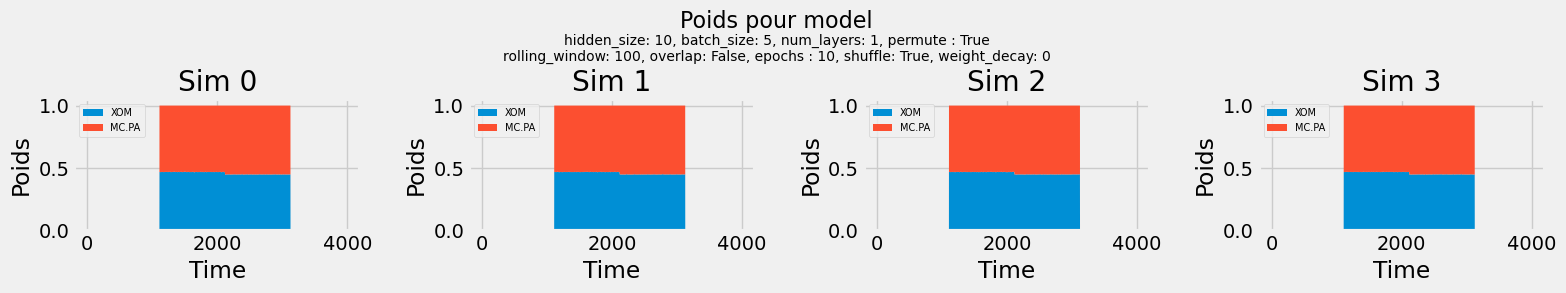

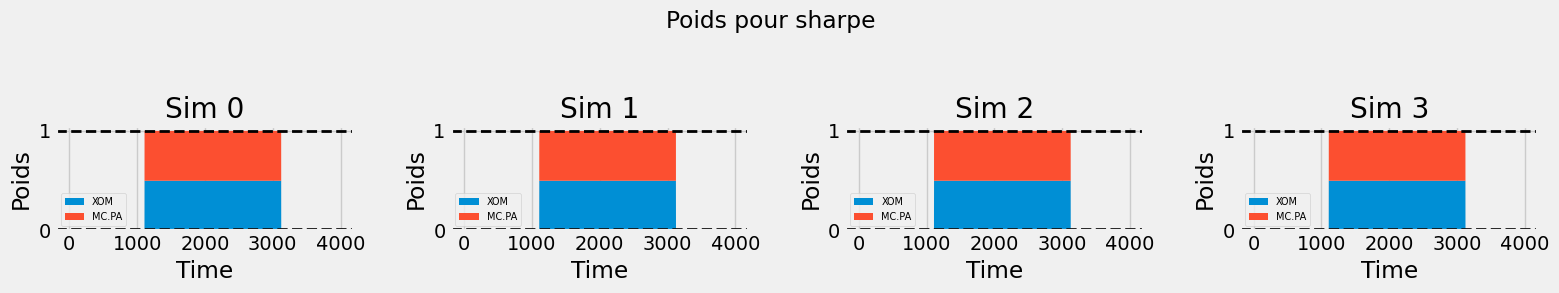

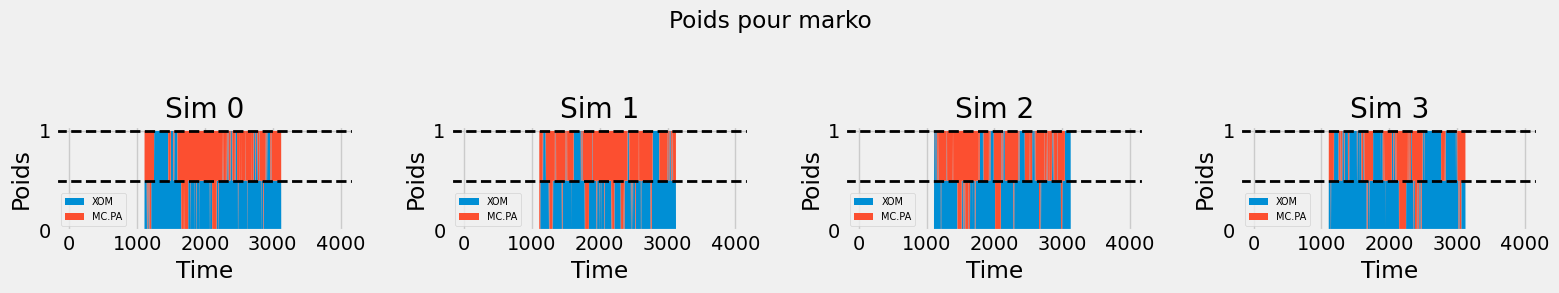

In [57]:
financial_dataset = FinancialDataset(tickers=['XOM', 'MC.PA'], synthetic=True, n_simul=4, n_synthetic=4000)

data_handler = DataHandler(
    dataset=financial_dataset,
    initial_train_years=4,
    retrain_years=4,
    rolling_window=100,
    batch_size=5,
    overlap=False,
    shuffle=True,
    on_synthetic=True
)

trainer = PortfolioTrainer(
    model=NN_Sharpe(input_size=data_handler.n_assets,
                    hidden_size=10,
                    num_layers=1,
                    
                    output_size=data_handler.n_assets,
                    temperature=1),
    
    data_handler=data_handler,
    device='cpu',
    epochs=10,
    lr=0.001,
    weight_decay=0,
    permute_assets=True
)

trainer.train(compute_marko_weights=['sharpe' , 'marko'])
trainer.plot_weights()
trainer.plot_weights(type_w='sharpe', th_weights='sharpe')
trainer.plot_weights(type_w='marko', th_weights='marko')